In [34]:
import numpy as np 
import pandas  as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import torch

X , y = make_blobs(n_samples = 1000 , n_features = 2 ,
                   centers = 4 , cluster_std = 1.5 ,
                   random_state = 42)

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)


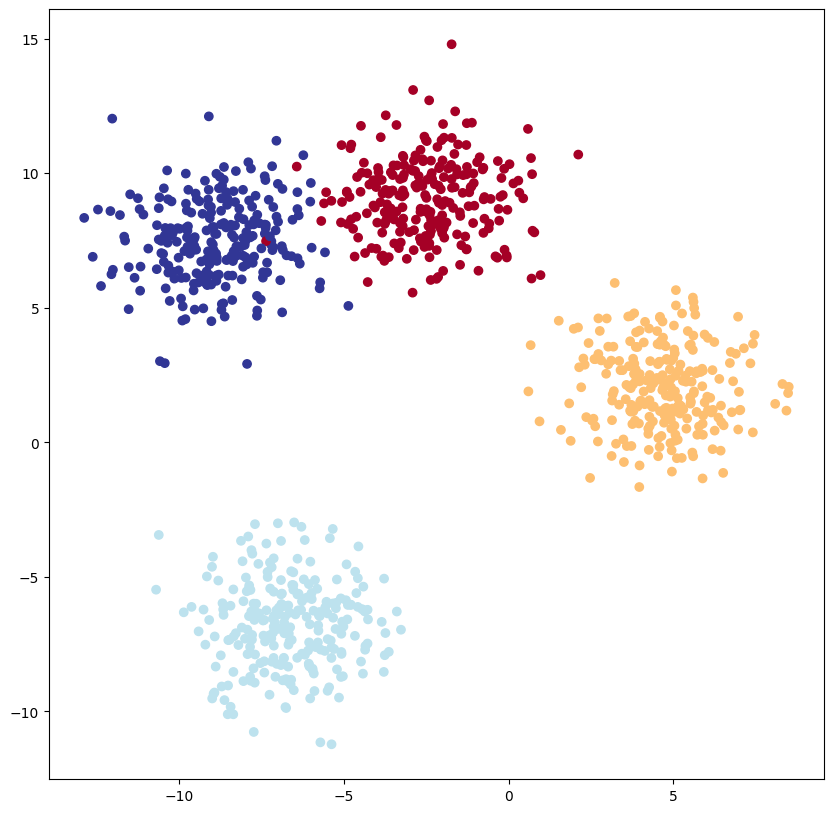

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10 , 10))
plt.scatter(X[: , 0] ,X[: , 1] , c = y , cmap = plt.cm.RdYlBu)

In [36]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 43)

In [37]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [38]:
from torch import nn
class BlobModel(nn.Module):

    def __init__(self , input_features , output_features , hidden_units = 8):
        """Initialize Multi_class Classification Model.
         
        
        Args: 
            input_features : Number of input features to the Model
            output_features : Number of output features to the Model
            hidden_units : Number of hidden units in the model (default = 8)
          
           
             """

        super().__init__()

        self.linear_stack = nn.Sequential(
            nn.Linear(in_features=input_features , out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units , out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units , out_features = output_features)
            
        )
    

    def forward(self , x):
        return self.linear_stack(x)

model = BlobModel(input_features=2 , output_features=4 , hidden_units=8).to(device)

In [39]:
model.state_dict()

OrderedDict([('linear_stack.0.weight',
              tensor([[-0.0651, -0.4292],
                      [ 0.5954, -0.2175],
                      [-0.4977, -0.5857],
                      [ 0.1286, -0.6139],
                      [ 0.3502,  0.1772],
                      [ 0.6211, -0.5179],
                      [ 0.0270,  0.0474],
                      [ 0.0531,  0.2911]])),
             ('linear_stack.0.bias',
              tensor([-0.1025, -0.3166,  0.4802, -0.4861, -0.5555,  0.3198, -0.2488,  0.5505])),
             ('linear_stack.2.weight',
              tensor([[-0.2604,  0.2386,  0.0442, -0.0609,  0.2560, -0.1561,  0.0590, -0.1211],
                      [ 0.1254,  0.1447,  0.2975, -0.1883,  0.0888, -0.0266,  0.2585, -0.2337],
                      [-0.1213,  0.2590,  0.1379, -0.0954,  0.1107,  0.1302, -0.1068, -0.2853],
                      [-0.2728,  0.2130, -0.0357,  0.1847, -0.2687,  0.3120,  0.1112, -0.0213],
                      [-0.1493, -0.0608, -0.2475, -0.2996, -0.132

In [40]:
X_train.shape , y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [41]:
torch.unique(y_train)

tensor([0, 1, 2, 3])

In [42]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters() , lr = 0.01)

# Building a Training Loop

In [43]:
y_pred = model(X_test.to(device))

In [44]:
y_pr = torch.softmax(y_pred , dim = 1)
y_pr

tensor([[0.6792, 0.1367, 0.0658, 0.1184],
        [0.3708, 0.1901, 0.1942, 0.2449],
        [0.7441, 0.1234, 0.0444, 0.0882],
        [0.3615, 0.1878, 0.2033, 0.2474],
        [0.3749, 0.2021, 0.2054, 0.2176],
        [0.3680, 0.1890, 0.1984, 0.2446],
        [0.7301, 0.1241, 0.0505, 0.0953],
        [0.3909, 0.2151, 0.2016, 0.1924],
        [0.3303, 0.1855, 0.2402, 0.2440],
        [0.2836, 0.1638, 0.2519, 0.3008],
        [0.3634, 0.1881, 0.2014, 0.2471],
        [0.3641, 0.1892, 0.2030, 0.2436],
        [0.3853, 0.2135, 0.2054, 0.1958],
        [0.7745, 0.1094, 0.0366, 0.0795],
        [0.5885, 0.1571, 0.1058, 0.1486],
        [0.3786, 0.2071, 0.2066, 0.2076],
        [0.2832, 0.1641, 0.2529, 0.2998],
        [0.3665, 0.1882, 0.1977, 0.2476],
        [0.3587, 0.1935, 0.2146, 0.2332],
        [0.2136, 0.1265, 0.2309, 0.4290],
        [0.3569, 0.1914, 0.2140, 0.2378],
        [0.3606, 0.1890, 0.2072, 0.2432],
        [0.7157, 0.1278, 0.0555, 0.1009],
        [0.3703, 0.1897, 0.1954, 0

In [45]:
torch.argmax(y_pr , dim = 1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0,
        0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0,
        0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0,
        0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0,
        0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
        0, 0, 3, 0, 0, 0, 0, 3])

In [46]:

def acc(y_true , y_pred):

    correct = torch.eq(y_true , y_pred).sum().item()

    acc = (correct / len(y_pred))*100
    return acc

In [50]:
torch.manual_seed(43)
torch.cuda.manual_seed(43)

X_train ,y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

epochs = 100

for epoch in range(epochs):

    model.train()

    y_logits = model(X_train)
    y_pred = torch.softmax(y_logits , dim = 1).argmax(dim = 1)
    # print(y_train.dtype)
    loss = loss_fn(y_logits , y_train)

    accuracy = acc(y_train , y_pred)

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test)
        test_pred = torch.softmax(test_logits , dim = 1).argmax(dim = 1)

        test_loss = loss_fn(test_logits , y_test)
        test_acc = acc(y_test , test_pred)

    if epoch%10 == 0:
        print(f"Epoch: {epoch}   | loss : {loss} | test_loss: {test_loss}   | accuracy: {accuracy}")




Epoch: 0   | loss : 0.011212805286049843 | test_loss: 0.002501734998077154   | accuracy: 99.75
Epoch: 10   | loss : 0.011240445077419281 | test_loss: 0.0030394529458135366   | accuracy: 99.5
Epoch: 20   | loss : 0.011282261461019516 | test_loss: 0.002583153545856476   | accuracy: 99.75
Epoch: 30   | loss : 0.011221668682992458 | test_loss: 0.0030776276253163815   | accuracy: 99.625
Epoch: 40   | loss : 0.011129765771329403 | test_loss: 0.0026368272956460714   | accuracy: 99.5
Epoch: 50   | loss : 0.011068561114370823 | test_loss: 0.002195661887526512   | accuracy: 99.625
Epoch: 60   | loss : 0.01113014854490757 | test_loss: 0.0028185260016471148   | accuracy: 99.625
Epoch: 70   | loss : 0.011097625829279423 | test_loss: 0.003038561437278986   | accuracy: 99.625
Epoch: 80   | loss : 0.011029291898012161 | test_loss: 0.002875905018299818   | accuracy: 99.625
Epoch: 90   | loss : 0.011277835816144943 | test_loss: 0.0019029584946110845   | accuracy: 99.5


In [51]:
model.eval()
with torch.inference_mode():
    y_logits = model(X_test)

y_logits[:10]


tensor([[-54.4334,  -2.1042,  29.8500,  17.3626],
        [ 11.4885, -11.7856, -12.2579,  -9.7482],
        [-65.9404,  -0.5838,  36.2314,  20.9162],
        [ -2.4356, -14.7192, -10.2468,   3.0951],
        [ -9.3467, -18.4586,  -6.0832,   6.6580],
        [  8.3508, -10.9117, -11.5407,  -6.0875],
        [-61.4104,  -1.2950,  33.6989,  19.5565],
        [-18.0736, -18.0852,  -3.9358,  13.5294],
        [ -8.0459,  12.7048,  -3.8487, -12.7486],
        [-18.4069,  24.5236,  -5.3419, -18.0317]])

In [61]:
y_pred = torch.softmax(y_logits , dim = 1)
y_pred[:10]

tensor([[2.4899e-37, 1.3258e-14, 1.0000e+00, 3.7740e-06],
        [1.0000e+00, 7.8015e-11, 4.8650e-11, 5.9846e-10],
        [4.2039e-45, 1.0265e-16, 1.0000e+00, 2.2320e-07],
        [3.9477e-03, 1.8266e-08, 1.5995e-06, 9.9605e-01],
        [1.1201e-07, 1.2360e-11, 2.9280e-06, 1.0000e+00],
        [1.0000e+00, 4.3092e-09, 2.2973e-09, 5.3643e-07],
        [4.9494e-42, 6.3437e-16, 1.0000e+00, 7.2118e-07],
        [1.8836e-14, 1.8618e-14, 2.5999e-08, 1.0000e+00],
        [9.7292e-10, 1.0000e+00, 6.4704e-08, 8.8258e-12],
        [2.2673e-19, 1.0000e+00, 1.0705e-13, 3.2998e-19]])

In [62]:
y_test[:10]

tensor([2, 0, 2, 3, 3, 0, 2, 3, 1, 1])

In [63]:
y_pred = torch.argmax(y_pred , dim = 1)
y_pred[:10]

tensor([2, 0, 2, 3, 3, 0, 2, 3, 1, 1])

In [64]:
!pip install torchmetrics

   ---------------------------------------- 0.0/869.2 kB ? eta -:--:--
   --------------------------------------- 869.2/869.2 kB 12.9 MB/s eta 0:00:00


In [70]:
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy(task = "multiclass" , num_classes=4).to(device)

torchmetric_accuracy(y_pred , y_test)

tensor(1.)